In [3]:
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import brown, stopwords
from nltk import FreqDist
from nltk.corpus import wordnet as wn

1. ○ Create a variable phrase containing a list of words. Experiment with the operations
described in this chapter, including addition, multiplication, indexing, slicing,
and sorting.

In [2]:
a = ['Create', 'a', 'variable', 'phrase', 'containing', 'a', 'list', 'of', 'words']
a[3]

'phrase'

In [3]:
print(a*4)

['Create', 'a', 'variable', 'phrase', 'containing', 'a', 'list', 'of', 'words', 'Create', 'a', 'variable', 'phrase', 'containing', 'a', 'list', 'of', 'words', 'Create', 'a', 'variable', 'phrase', 'containing', 'a', 'list', 'of', 'words', 'Create', 'a', 'variable', 'phrase', 'containing', 'a', 'list', 'of', 'words']


In [4]:
a.index('a')

1

In [5]:
a.count('a')

2

In [6]:
a.sort()
print(a)

['Create', 'a', 'a', 'containing', 'list', 'of', 'phrase', 'variable', 'words']


2. ○ Use the corpus module to explore austen-persuasion.txt. How many word
tokens does this book have? How many word types? 

In [67]:
emma = gutenberg.words('austen-persuasion.txt')

print(len(emma))
len(sorted(set([w.lower() for w in emma])))

98171


5835

3. ○ Use the Brown Corpus reader nltk.corpus.brown.words() or the Web Text Corpus
reader nltk.corpus.webtext.words() to access some sample text in two different
genres.

In [8]:
nltk.corpus.webtext.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']

In [9]:
nltk.corpus.webtext.words('wine.txt')

['Lovely', 'delicate', ',', 'fragrant', 'Rhone', ...]

4. ○ Read in the texts of the State of the Union addresses, using the state_union corpus 
reader. Count occurrences of men, women, and people in each document. What has
happened to the usage of these words over time?

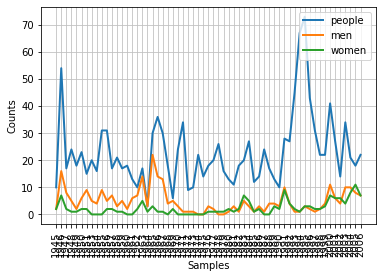

In [10]:
from nltk.corpus import state_union
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in state_union.fileids()
    for w in state_union.words(fileid)
    for target in ['men', 'women', 'people']
    if w.lower().startswith(target))
cfd.plot()

5. ○ Investigate the holonym-meronym relations for some nouns. Remember that
there are three kinds of holonym-meronym relation, so you need to use member_mer
onyms(), part_meronyms(), substance_meronyms(), member_holonyms(),
part_holonyms(), and substance_holonyms().

In [12]:
wn.synset('piano.n.01').part_meronyms()

[Synset('fallboard.n.01'),
 Synset('keyboard.n.01'),
 Synset('piano_action.n.01'),
 Synset('piano_keyboard.n.01'),
 Synset('soft_pedal.n.01'),
 Synset('sounding_board.n.02'),
 Synset('sustaining_pedal.n.01')]

In [14]:
wn.synset('table.n.01').member_meronyms()

[Synset('column.n.03'), Synset('row.n.05')]

In [20]:
wn.synset('cloth.n.01').substance_meronyms()

[Synset('warp.n.04'), Synset('woof.n.01')]

In [32]:
wn.synset('letter.n.01').member_holonyms()

[]

In [33]:
wn.synset('letter.n.01').part_holonyms()

[Synset('correspondence.n.01'), Synset('mail.n.01')]

In [10]:
wn.synsets('piano')
wn.synset('piano.n.01').lemma_names()
wn.synset('piano.n.02').lemma_names()
wn.synset('piano.n.01').definition()
for synset in wn.synsets('piano'):
    print(synset.lemma_names())

['piano', 'pianoforte', 'forte-piano']
['piano', 'pianissimo']
['piano', 'soft']
['piano', 'softly']


In [11]:
piano= wn.synset('piano.n.01')
piano_t = piano.hyponyms()
sorted(lemma.name() for synset in piano_t for lemma in synset.lemmas())

['Pianola',
 'grand',
 'grand_piano',
 'mechanical_piano',
 'player_piano',
 'upright',
 'upright_piano']

6. ○ In the discussion of comparative wordlists, we created an object called trans
late, which you could look up using words in both German and Italian in order to get corresponding words in English. What problem might arise with this approach?
Can you suggest a way to avoid this problem?

In [72]:
from nltk.corpus import swadesh
de2en = swadesh.entries(['de', 'en'])
es2en = swadesh.entries(['es', 'en']) 
de2en = [(d + '-de', e) for (d, e) in swadesh.entries(['de', 'en'])]
translate = dict(de2en)
translate.update(dict(de2en))
translate.update(dict(es2en))
translate['Hund-de']

'dog'

7. ○ According to Strunk and White’s Elements of Style, the word however, used at
the start of a sentence, means “in whatever way” or “to whatever extent,” and not
“nevertheless.” They give this example of correct usage: However you advise him,
he will probably do as he thinks best. (http://www.bartleby.com/141/strunk3.html)
Use the concordance tool to study actual usage of this word in the various texts we
have been considering. See also the LanguageLog posting “Fossilized prejudices
about ‘however’” at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913
.html.

In [77]:
from nltk.corpus import inaugural
text = nltk.Text(nltk.corpus.inaugural.words())
text.concordance("however")

Displaying 25 of 55 matches:
 this extensive country . Relying , however , on the purity of their intentions
t become me here to speak . I may , however , be pardoned for not suppressing t
 accord in all questions touching , however remotely , the liberty , prosperity
its overthrow . These occurrences , however , have been far less frequent in ou
s and promises made in the former . However much the world may have improved in
ered with the intention to betray . However strong may be my present purpose to
e citizen . As was to be expected , however , from the defect of language and t
lation to the latter also . It is , however , consolatory to reflect that most 
the States to its correction . As , however , one mode of correction is in the 
e our system . It may be observed , however , as a general remark , that republ
ome others of a similar character , however , it appears to be highly expedient
he judiciary to declare void ; that however enlightened and patriotic they migh
 members of

In [78]:
#rule follows Strunk and White’s Elements of Style

8. ◑ Define a conditional frequency distribution over the Names Corpus that allows
you to see which initial letters are more frequent for males versus females (see
Figure 2-7).

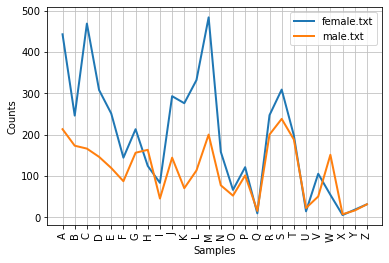

In [11]:
names = nltk.corpus.names
cfd = nltk.ConditionalFreqDist(
    (fileid, name[0])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

9. ◑ Pick a pair of texts and study the differences between them, in terms of vocabulary,
vocabulary richness, genre, etc. Can you find pairs of words that have quite
different meanings across the two texts, such as monstrous in Moby Dick and in
Sense and Sensibility?

In [84]:
def lexical_diversity(text):
    return len(set(text)) / len(text)
print(lexical_diversity('1789-Washington.txt'))
print(lexical_diversity('1941-Roosevelt.txt'))
print(lexical_diversity('2017-Trump.txt'))
print(lexical_diversity('2013-Obama.txt'))
print(lexical_diversity('2013-Obama.txt'))

0.8421052631578947
0.7222222222222222
0.9285714285714286
0.8571428571428571
0.8571428571428571


In [91]:
Was_text = nltk.Text(inaugural.words('1789-Washington.txt'))
Oba_text = nltk.Text(inaugural.words('2013-Obama.txt'))
austen = nltk.Text(gutenberg.words('austen-persuasion.txt'))
Was_text.concordance("country")
Oba_text.concordance("country")
austen.concordance("country")

Displaying 5 of 5 matches:
the one hand , I was summoned by my Country , whose voice I can never hear but 
 the trust to which the voice of my country called me , being sufficient to awa
nd its consequences be judged by my country with some share of the partiality i
faction which an ardent love for my country can inspire , since there is no tru
 with a call into the service of my country , then on the eve of an arduous str
Displaying 7 of 7 matches:
 , the people , understand that our country cannot succeed when a shrinking few
 for the generation that built this country and investing in the generation tha
rn . We do not believe that in this country freedom is reserved for the lucky ,
us to take the risks that make this country great . We , the people , still bel
force rather than expelled from our country . Our journey is not complete until
is Capitol , was an oath to God and country , not party or faction . And we mus
tizens , have the power to set this country ' s course . You and I

In [92]:
nltk.Text(Was_text).similar('God')
nltk.Text(Oba_text).similar('God')
nltk.Text(austen).similar('God')

No matches
science crises try
as no you sense manners style night


In [93]:
nltk.Text(Was_text).similar('country')
nltk.Text(Oba_text).similar('country')
nltk.Text(austen).similar('country')


moment wives
time world consequence room other way same astonishment window day
best acquaintance idea town subject others question case gentleman
pleasure


10. ◑ Read the BBC News article: “UK’s Vicky Pollards ‘left behind’” at http://news
.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic
about teen language: “the top 20 words used, including yeah, no, but and like,
account for around a third of all words.” How many word types account for a third
of all word tokens, for a variety of text sources? What do you conclude about this
statistic? Read more about this on LanguageLog, at http://itre.cis.upenn.edu/~myl/
languagelog/archives/003993.html.

In [94]:
#everyday language is much less diverse than written. 
#Moreover, it is not a surprise, that language of young people is not as diverse. 
#The thing is that earlier, there were no means to investigate the issue, 
#since the written text is usually novels written by educated people. 

11. ◑ Investigate the table of modal distributions and look for other patterns. Try to
explain them in terms of your own impressionistic understanding of the different
genres. Can you find other closed classes of words that exhibit significant differences
across different genres?

12. ◑ The CMU Pronouncing Dictionary contains multiple pronunciations for certain
words. How many distinct words does it contain? What fraction of words in this
dictionary have more than one possible pronunciation?

In [56]:
prondict = nltk.corpus.cmudict.dict()
words = 0
for key in prondict:
    if len(prondict[key]) > 1:
        words +=1
print(words)
print(len(prondict))
print(words/ len(prondict))

9241
123455
0.07485318537118789


13. ◑ What percentage of noun synsets have no hyponyms? You can get all noun synsets
using wn.all_synsets('n').

In [52]:
all_s = list(wn.all_synsets('n'))
hyp = [s for s in all_s if s.hyponyms() == []]
print((len(hyp)/len(all_s))*100)


79.67119283931072


14. ◑ Define a function supergloss(s) that takes a synset s as its argument and returns
a string consisting of the concatenation of the definition of s, and the definitions
of all the hypernyms and hyponyms of s.

In [66]:
def supergloss(s):
    word_def = s.definition() + '\n'
    for hypernym in s.hypernyms():
        word_def = word_def + hypernym.name() + ': ' + hypernym.definition() + '\n'
    for hyponym in s.hyponyms():
        word_def = word_def + hyponym.name() + ': ' + hyponym.definition() + '\n'
    return word_def
print(supergloss(wn.synset('piano.n.01')))

a keyboard instrument that is played by depressing keys that cause hammers to strike tuned strings and produce sounds
keyboard_instrument.n.01: a musical instrument that is played by means of a keyboard
percussion_instrument.n.01: a musical instrument in which the sound is produced by one object striking another
stringed_instrument.n.01: a musical instrument in which taut strings provide the source of sound
grand_piano.n.01: a piano with the strings on a horizontal harp-shaped frame; usually supported by three legs
mechanical_piano.n.01: a mechanically operated piano that uses a roll of perforated paper to activate the keys
upright.n.02: a piano with a vertical sounding board



15. ◑ Write a program to find all words that occur at least three times in the Brown
Corpus.

In [12]:
freq = FreqDist(w.lower() for w in brown.words() if w.isalpha())
sorted(w for w in set(brown.words()) if freq[w] >= 3)

['a',
 'ab',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abbey',
 'abdomen',
 'abdominal',
 'aberrant',
 'aberration',
 'aberrations',
 'abetted',
 'abeyance',
 'abide',
 'abiding',
 'abilities',
 'ability',
 'abject',
 'ablaze',
 'able',
 'abnormal',
 'aboard',
 'abode',
 'abolish',
 'abolition',
 'abolitionists',
 'aborigine',
 'aborigines',
 'abortion',
 'abortive',
 'about',
 'above',
 'abreast',
 'abroad',
 'abrupt',
 'abruptly',
 'abscesses',
 'absence',
 'absences',
 'absent',
 'absently',
 'absolute',
 'absolutely',
 'absolutes',
 'absorb',
 'absorbed',
 'absorbing',
 'absorption',
 'abstention',
 'abstract',
 'abstracted',
 'abstracting',
 'abstraction',
 'abstractionists',
 'abstractions',
 'abstracts',
 'absurd',
 'absurdity',
 'abundance',
 'abundant',
 'abuse',
 'abused',
 'abuses',
 'abyss',
 'acacia',
 'academic',
 'academically',
 'academies',
 'academy',
 'accelerate',
 'accelerated',
 'accelerating',
 'acceleration',
 'accelerator',
 'accelerators',
 'a

16. ◑ Write a program to generate a table of lexical diversity scores (i.e., token/type
ratios), as we saw in Table 1-1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [13]:
def lexical_diversity(text):
    return len(set(text)) / len(text)
for genre in nltk.corpus.brown.categories():
    print(genre, lexical_diversity(brown.words(categories=genre)))

adventure 0.1279743878169075
belles_lettres 0.10642071451679992
editorial 0.16054152327770924
fiction 0.1358194136199042
government 0.11667641228232811
hobbies 0.14493897625842492
humor 0.23125144042406084
learned 0.09268890745953554
lore 0.13148804612915801
mystery 0.12212912592488936
news 0.14314696580941583
religion 0.1617553745018909
reviews 0.21192020440251572
romance 0.12070492131044529
science_fiction 0.22342778161713892


17. ◑ Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [65]:
def frequent_words(text):
    stopwords = nltk.corpus.stopwords.words('english')
    freq = FreqDist(w for w in text if w.lower() not in stopwords and w.isalpha())
    return freq.most_common(50)

print(frequent_words(emma))

[('Anne', 497), ('could', 444), ('would', 351), ('Captain', 297), ('Mrs', 291), ('Elliot', 288), ('Mr', 256), ('must', 228), ('one', 221), ('Wentworth', 218), ('much', 205), ('Lady', 191), ('good', 181), ('little', 175), ('said', 173), ('Charles', 166), ('might', 166), ('never', 153), ('time', 151), ('think', 149), ('Russell', 148), ('Sir', 144), ('Walter', 141), ('well', 141), ('Mary', 138), ('man', 133), ('nothing', 131), ('Musgrove', 130), ('know', 127), ('Miss', 123), ('see', 123), ('soon', 121), ('father', 117), ('great', 116), ('first', 112), ('two', 112), ('Louisa', 111), ('quite', 110), ('always', 109), ('though', 107), ('without', 106), ('Bath', 99), ('every', 96), ('made', 96), ('long', 95), ('say', 93), ('seemed', 93), ('thought', 90), ('Elizabeth', 89), ('last', 88)]


18. ◑ Write a program to print the 50 most frequent bigrams (pairs of adjacent words)
of a text, omitting bigrams that contain stopwords.

In [31]:
def frequent_bigrams(text):
    stopwords = nltk.corpus.stopwords.words('english')
    bigrams = list(nltk.bigrams(text))
    print(bigrams)
    freq = FreqDist(b for b in bigrams if b not in stopwords)
    return freq.most_common(50)


19. ◑ Write a program to create a table of word frequencies by genre, like the one given
in Section 2.1 for modals. Choose your own words and try to find words whose
presence (or absence) is typical of a genre. Discuss your findings.

In [36]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
pron = ['I', 'you', 'we', 'she', 'he', 'it', 'they']
cfd.tabulate(conditions=genres, samples=pron)

                   I  you   we  she   he   it they 
           news  179   55   77   42  451  363  205 
       religion  155  100  176   10  137  264  115 
        hobbies  154  383  100   21  155  476  177 
science_fiction   98   81   30   36  139  129   53 
        romance  951  456   78  496  702  573  168 
          humor  239  131   32   58  146  162   70 


20. ◑ Write a function word_freq() that takes a word and the name of a section of the
Brown Corpus as arguments, and computes the frequency of the word in that section
of the corpus.

In [64]:
def word_freq(word, genre):
    f_d = nltk.FreqDist(brown.words(categories=genre))
    return f_d[word]
word_freq('We', 'news')

30

21. ◑ Write a program to guess the number of syllables contained in a text, making
use of the CMU Pronouncing Dictionary.

In [76]:
def syll_numb(text):
    prondict = nltk.corpus.cmudict.dict()
    word = 0
    for w in text:
        if w in prondict.keys():
            word += len(prondict[w][0])
    print(word)

syll_numb(emma)  

265006


22. ◑ Define a function hedge(text) that processes a text and produces a new version
with the word 'like' between every third word.

23. ● Zipf’s Law: Let f(w) be the frequency of a word w in free text. Suppose that all
the words of a text are ranked according to their frequency, with the most frequent
word first. Zipf’s Law states that the frequency of a word type is inversely
proportional to its rank (i.e., f × r = k, for some constant k). For example, the 50th
most common word type should occur three times as frequently as the 150th most
common word type.
a. Write a function to process a large text and plot word frequency against word
rank using pylab.plot. Do you confirm Zipf’s law? (Hint: it helps to use a
logarithmic scale.) What is going on at the extreme ends of the plotted line?
b. Generate random text, e.g., using random.choice("abcdefg "), taking care to
include the space character. You will need to import random first. Use the string
concatenation operator to accumulate characters into a (very) long string.
Then tokenize this string, generate the Zipf plot as before, and compare the
two plots. What do you make of Zipf’s Law in the light of this?

24. ● Modify the text generation program in Example 2-1 further, to do the following
tasks: a. Store the n most likely words in a list words, then randomly choose a word
from the list using random.choice(). (You will need to import random first.)
b. Select a particular genre, such as a section of the Brown Corpus or a Genesis
translation, one of the Gutenberg texts, or one of the Web texts. Train the
model on this corpus and get it to generate random text. You may have to
experiment with different start words. How intelligible is the text? Discuss the
strengths and weaknesses of this method of generating random text.
c. Now train your system using two distinct genres and experiment with generating
text in the hybrid genre. Discuss your observations.

In [98]:
import random
def generate_model(text, n):
    fdist = FreqDist(text)
    likely = fdist.most_common(n)
    bigrams = nltk.bigrams(text)
    cfd = nltk.ConditionalFreqDist(bigrams)
    for i in range(n):
        print(random.choice(likely)[0], end=' ')

generate_model(emma, 100)

Sir Mr from this ' Mrs a his this were so my " is and no ," which you might have little an to He his might this and that in an ," Lady was the , his said they which were that such who did should ; on never and He ," her me Captain Charles not It him were than as " his all Mrs is being no Charles ! such and no been than said an is any do ! It have Walter s than s in good could but think he Elliot will Mr was - 

25. ● Define a function find_language() that takes a string as its argument and returns
a list of languages that have that string as a word. Use the udhr corpus and limit
your searches to files in the Latin-1 encoding.

In [117]:
from nltk.corpus import udhr
def find_language(word):
    lang = []
    for fileid in udhr.fileids():
        if fileid.endswith('-Latin1') and word in udhr.words(fileid):
            lang.append(fileid)
    return lang
find_language("is")

['Afrikaans-Latin1',
 'Dutch_Nederlands-Latin1',
 'English-Latin1',
 'Frisian-Latin1',
 'Hungarian_Magyar-Latin1',
 'IrishGaelic_Gaeilge-Latin1',
 'Mam-Latin1',
 'Mazateco-Latin1',
 'ScottishGaelic_GaidhligAlbanach-Latin1',
 'Shipibo-Conibo-Latin1',
 'Somali-Latin1']

26. ● What is the branching factor of the noun hypernym hierarchy? I.e., for every
noun synset that has hyponyms—or children in the hypernym hierarchy—how
many do they have on average? You can get all noun synsets using wn.all_syn
sets('n').

In [12]:
noun_hyp = 0
sum_hyp = 0
for synset in wn.all_synsets('n'):
    if synset.hyponyms() != []:
        noun_hyp += 1
        sum_hyp += len(synset.hyponyms())
print(sum_hyp/noun_hyp)

4.543820763194153


27. ● The polysemy of a word is the number of senses it has. Using WordNet, we can
determine that the noun dog has seven senses with len(wn.synsets('dog', 'n')).
Compute the average polysemy of nouns, verbs, adjectives, and adverbs according
to WordNet.

28. ● Use one of the predefined similarity measures to score the similarity of each of
the following pairs of words. Rank the pairs in order of decreasing similarity. How
close is your ranking to the order given here, an order that was established experimentally
by (Miller & Charles, 1998): car-automobile, gem-jewel, journey-voyage,
boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnacestove,
food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, ladbrother,
crane-implement, journey-car, monk-oracle, cemetery-woodland, foodrooster,
coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest,
lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.